In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

PATH = 'data/decoupling.csv'

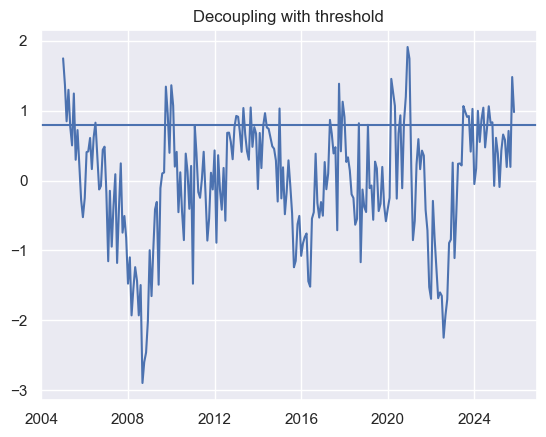

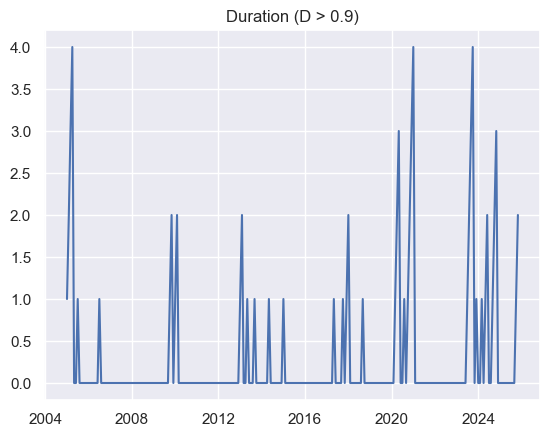

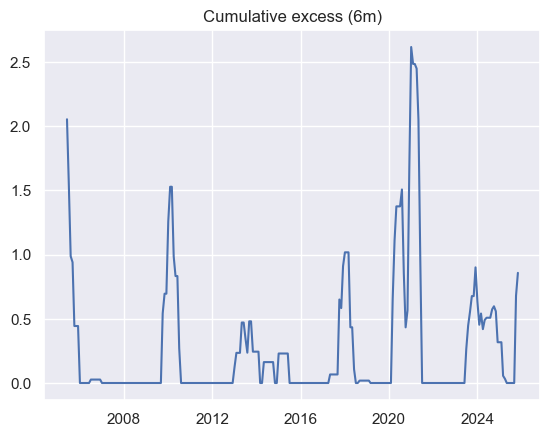

In [38]:
# ===== load =====
df = pd.read_csv(PATH)
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date").drop_duplicates("date", keep="last")
df = df.set_index("date")

df["D"] = pd.to_numeric(df["gap"], errors="coerce")
df = df.dropna(subset=["D"])

# ===== threshold 정의 =====
thr = 0.8

df["above_thr"] = df["D"] > thr
df["excess"] = (df["D"] - thr).clip(lower=0.0)

# ===== duration 계산 =====
dur = []
count = 0

for v in df["above_thr"]:
    if v:
        count += 1
    else:
        count = 0
    dur.append(count)

df["duration"] = dur

# ===== intensity 누적 =====
L = 6
df["CD_excess_6m"] = df["excess"].rolling(L, min_periods=L).sum()

# ===== plot =====
plt.figure()
plt.plot(df.index, df["D"])
plt.axhline(thr)
plt.title("Decoupling with threshold")
plt.show()

plt.figure()
plt.plot(df.index, df["duration"])
plt.title("Duration (D > 0.9)")
plt.show()

plt.figure()
plt.plot(df.index, df["CD_excess_6m"])
plt.title("Cumulative excess (6m)")
plt.show()
